# 📦 Import Libraries

In [38]:
import os
import joblib

In [39]:
import numpy as np
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [41]:
from lazypredict.Supervised import LazyRegressor

In [42]:
from utils.data_acquisition import *
from utils.data_preprocessing import *

In [43]:
plot_size = (12, 6)

graph_colors = {
  "black": "#1F1E1F",
  "blue": "#03A9CE",
}

text_colors = {
  "title": "#262626",
  "subtitle": "#646464",
}

fig_path = "./figures/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# 💾 Data Acquisition

In [44]:
DATA_PATH = "./data/"

GASOLINE_DATA_PATH_1 = DATA_PATH + "[Gasolina] Trajeto Casa-Escola-UFRN/"
GASOLINE_DATA_PATH_2 = DATA_PATH + "[Gasolina2023] Trajeto Casa-Escola-UFRN/"
ETHANOL_DATA_PATH = DATA_PATH + "[Etanol] Trajeto Casa-Escola-UFRN/"

GASOLINE_DATA_PATHS_1 = get_list_paths(GASOLINE_DATA_PATH_1)
GASOLINE_DATA_PATHS_2 = get_list_paths(GASOLINE_DATA_PATH_2)

GASOLINE_DATA_PATHS = GASOLINE_DATA_PATHS_1 + GASOLINE_DATA_PATHS_2

ETHANOL_DATA_PATHS = get_list_paths(ETHANOL_DATA_PATH)

SELECTED_COLUMNS = [
  "DeviceTime",
  "Latitude",
  "Longitude",
  "Speed(OBD)(km/h)",
  "MassAirFlowRate(g/s)",
  "Acceleration"
]

In [45]:
all_data_gasoline = read_all_data(GASOLINE_DATA_PATHS)
all_data_ethanol = read_all_data(ETHANOL_DATA_PATHS)

# 🧩 Data Modelling

In [46]:
for data in all_data_gasoline:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_gasoline = concatenate_dataframes(all_data_gasoline)
all_data_gasoline = filter_columns(all_data_gasoline, SELECTED_COLUMNS)

all_data_gasoline.drop(columns=["DeviceTime"], inplace=True)

In [47]:
for data in all_data_ethanol:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_ethanol = concatenate_dataframes(all_data_ethanol)
all_data_ethanol = filter_columns(all_data_ethanol, SELECTED_COLUMNS)

all_data_ethanol.drop(columns=["DeviceTime"], inplace=True)

In [48]:
X_train_gasoline, X_test_gasoline, y_train_gasoline, y_test_gasoline = split_data(
    all_data_gasoline.drop(columns=["MassAirFlowRate(g/s)"]),
    all_data_gasoline["MassAirFlowRate(g/s)"]
)

X_train_ethanol, X_test_ethanol, y_train_ethanol, y_test_ethanol = split_data(
    all_data_ethanol.drop(columns=["MassAirFlowRate(g/s)"]),
    all_data_ethanol["MassAirFlowRate(g/s)"]
)

# 🔎 Exploratory Data Analysis (EDA)

## Gasoline

In [49]:
all_data_gasoline.shape

(112964, 5)

## Ethanol

In [50]:
all_data_ethanol.shape

(40291, 5)

# 🤖 Model Training

## Gasoline

In [51]:
lr_gasoline_maf = LazyRegressor(
    verbose=0,
    ignore_warnings=False,
    custom_metric=None,
    random_state=42
)

In [52]:
models_gasoline_maf, predictions_gasoline_maf = lr_gasoline_maf.fit(
    X_train_gasoline.values,
    X_test_gasoline.values,
    y_train_gasoline.values,
    y_test_gasoline.values
)

  0%|          | 0/42 [00:00<?, ?it/s]

 21%|██▏       | 9/42 [00:23<02:14,  4.08s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 60.8 GiB for an array with shape (90371, 90371) and data type float64


 45%|████▌     | 19/42 [00:34<00:24,  1.07s/it]

KernelRidge model failed to execute
Unable to allocate 60.8 GiB for an array with shape (90371, 90371) and data type float64


 79%|███████▊  | 33/42 [08:03<03:52, 25.78s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [14:51<00:00, 21.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 90371, number of used features: 4
[LightGBM] [Info] Start training from score 7.159929


In [53]:
models_gasoline_maf

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.71,0.71,2.89,0.19
RandomForestRegressor,0.71,0.71,2.89,42.92
ExtraTreesRegressor,0.70,0.70,2.97,15.50
BaggingRegressor,0.69,0.69,2.99,4.28
LGBMRegressor,0.68,0.68,3.05,0.18
HistGradientBoostingRegressor,0.68,0.68,3.05,0.54
KNeighborsRegressor,0.63,0.63,3.27,0.25
GradientBoostingRegressor,0.60,0.60,3.42,10.84
MLPRegressor,0.57,0.57,3.55,51.42


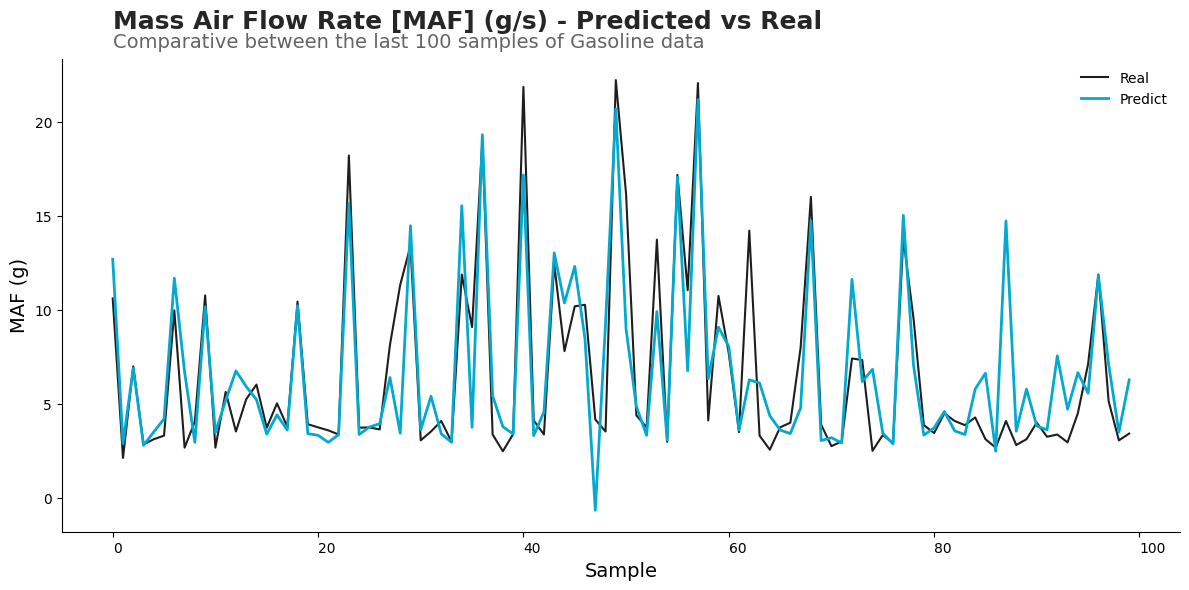

In [54]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("MAF (g)", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

y_pred = lr_gasoline_maf.models["XGBRegressor"].predict(X_test_gasoline)

ax.plot(list(range(100)), y_test_gasoline[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

# plt.text(0, 25, "Mass Air Flow Rate [MAF] (g/s) - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
# plt.text(0, 24, "Comparative between the last 100 samples of Gasoline data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}gasoline_maf.png")
plt.show()

## Ethanol

In [55]:
lr_ethanol_maf = LazyRegressor(
    verbose=0,
    ignore_warnings=False,
    custom_metric=None,
    random_state=42
)

In [56]:
models_ethanol_maf, predictions_ethanol_maf = lr_ethanol_maf.fit(
    X_train_ethanol.values,
    X_test_ethanol.values,
    y_train_ethanol.values,
    y_test_ethanol.values
)

 79%|███████▊  | 33/42 [11:25<01:00,  6.71s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [12:24<00:00, 17.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 32232, number of used features: 4
[LightGBM] [Info] Start training from score 7.052467


In [57]:
models_ethanol_maf

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.70,0.70,2.87,0.17
RandomForestRegressor,0.70,0.70,2.87,13.40
ExtraTreesRegressor,0.68,0.68,2.98,5.22
BaggingRegressor,0.67,0.67,2.98,1.48
HistGradientBoostingRegressor,0.67,0.67,3.01,0.45
LGBMRegressor,0.66,0.66,3.03,0.11
KNeighborsRegressor,0.61,0.61,3.26,0.10
GradientBoostingRegressor,0.56,0.56,3.45,3.64
MLPRegressor,0.52,0.52,3.61,17.99


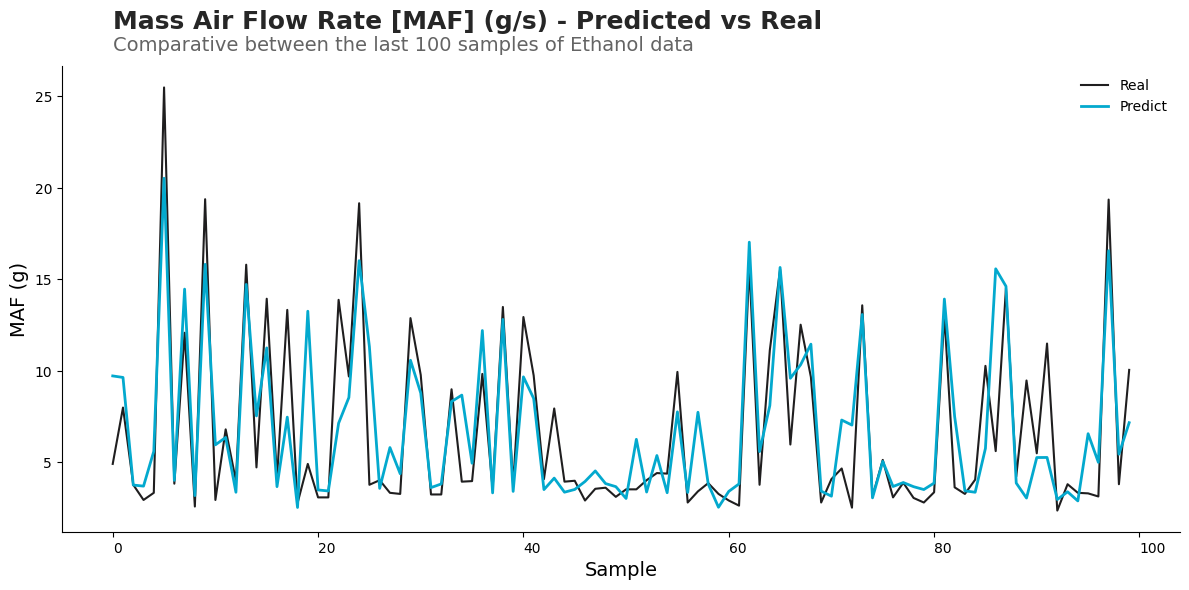

In [58]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("MAF (g)", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

y_pred = lr_ethanol_maf.models["XGBRegressor"].predict(X_test_ethanol)

ax.plot(list(range(100)), y_test_ethanol[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

# plt.text(0, 28.7, "Mass Air Flow Rate [MAF] (g/s) - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
# plt.text(0, 27.5, "Comparative between the last 100 samples of Ethanol data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}ethanol_maf.png")
plt.show()

# 💾 Save Model

In [59]:
joblib.dump(lr_gasoline_maf.models["XGBRegressor"], "./models/XGBRegressor_gasoline_maf.pkl")

['./models/XGBRegressor_gasoline_maf.pkl']

In [60]:
joblib.dump(lr_ethanol_maf.models["XGBRegressor"], "./models/XGBRegressor_ethanol_maf.pkl")

['./models/XGBRegressor_ethanol_maf.pkl']